In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from lazypredict.Supervised  import LazyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow import keras
import numpy as np 
from keras import layers

In [3]:
training_data = pd.read_csv('train.csv')
training_data.head()
training_data.isna().sum()
training_data.describe()
training_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 101763 non-null  int64  
 1   loc                101763 non-null  float64
 2   v(g)               101763 non-null  float64
 3   ev(g)              101763 non-null  float64
 4   iv(g)              101763 non-null  float64
 5   n                  101763 non-null  float64
 6   v                  101763 non-null  float64
 7   l                  101763 non-null  float64
 8   d                  101763 non-null  float64
 9   i                  101763 non-null  float64
 10  e                  101763 non-null  float64
 11  b                  101763 non-null  float64
 12  t                  101763 non-null  float64
 13  lOCode             101763 non-null  int64  
 14  lOComment          101763 non-null  int64  
 15  lOBlank            101763 non-null  int64  
 16  lo

In [18]:
training_data.columns

Index(['id', 'loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e',
       'b', 't', 'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment',
       'uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount',
       'defects'],
      dtype='object')

In [20]:
training_data.shape

(101763, 23)

In [19]:
training_data['t']

0         302.71
1          52.04
2          97.45
3          26.31
4          20.31
           ...  
101758     45.09
101759    626.01
101760    327.43
101761     85.22
101762   4278.43
Name: t, Length: 101763, dtype: float64

In [20]:
training_data.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,22.00,3.00,1.00,2.00,60.00,278.63,0.06,19.56,14.25,...,17,1,1,0,16.00,9.00,38.00,22.00,5.00,False
1,1,14.00,2.00,1.00,2.00,32.00,151.27,0.14,7.00,21.11,...,11,0,1,0,11.00,11.00,18.00,14.00,3.00,False
2,2,11.00,2.00,1.00,2.00,45.00,197.65,0.11,8.05,22.76,...,8,0,1,0,12.00,11.00,28.00,17.00,3.00,False
3,3,8.00,1.00,1.00,1.00,23.00,94.01,0.19,5.25,17.86,...,4,0,2,0,8.00,6.00,16.00,7.00,1.00,True
4,4,11.00,2.00,1.00,2.00,17.00,60.94,0.18,5.63,12.44,...,7,0,2,0,7.00,6.00,10.00,10.00,3.00,False


In [6]:
X = training_data.drop('defects', axis= 'columns')

In [7]:
y = training_data['defects']

In [12]:
scaled_X = StandardScaler().fit_transform(X)

In [24]:
X_train, X_test , y_train , y_test = train_test_split(scaled_X,y, train_size=.8, random_state=8, stratify=y )

In [25]:
X_test.shape, y_test.shape


((20353, 22), (20353,))

In [26]:
rf = RandomForestClassifier().fit(X_train,y_train)

In [27]:
dt_clf = DecisionTreeClassifier().fit(X_train, y_train)

In [28]:
svm_clf = SVC().fit(X_train, y_train)

In [29]:
lr_clf = LogisticRegression().fit(X_train, y_train)

In [30]:
lr_clf.score(X_test, y_test),rf.score(X_test, y_test),svm_clf.score(X_test, y_test),dt_clf.score(X_test, y_test)

(0.8087751191470545,
 0.8106421657740873,
 0.8135410013265858,
 0.7236279663931607)

In [47]:
cm  = confusion_matrix(y_test, dt_clf.predict(X_test))

<Axes: >

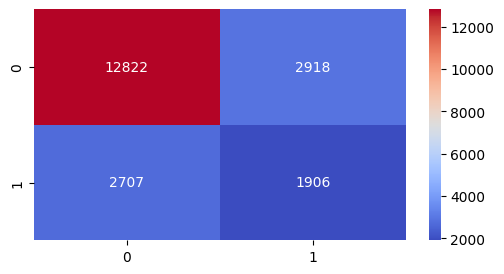

In [48]:
plt.figure(figsize=(6,3))
sns.heatmap(cm , annot=True, cmap="coolwarm",fmt='g')


In [34]:
test_df = pd.read_csv('test.csv')

In [41]:
predict = lr_clf.predict(test_df)
predict

array([ True,  True, False, ...,  True,  True,  True])

In [42]:
submit = ({"id":test_df['id'], "defects" : predict})

In [43]:
submit_df = pd.DataFrame(submit )

In [44]:
submit_df.to_csv("sample_submission1.csv")

In [49]:
predict2 = svm_clf.predict(test_df)
submit2 = ({"id" : test_df['id'], "defects" : predict2})

In [50]:
submit_df2 = pd.DataFrame(submit2)

In [51]:
submit_df2.to_csv("sample_submission2.csv")